# Text Processing

## Capturing Text Data

### Plain Text

In [1]:
import os

# Read in a plain text file
with open(os.path.join("data", "hieroglyph.txt"), "r") as f:
    text = f.read()
    print(text)

Hieroglyphic writing dates from c. 3000 BC, and is composed of hundreds of symbols. A hieroglyph can represent a word, a sound, or a silent determinative; and the same symbol can serve different purposes in different contexts. Hieroglyphs were a formal script, used on stone monuments and in tombs, that could be as detailed as individual works of art.



### Tabular Data

In [2]:
import pandas as pd

# Extract text column from a dataframe
df = pd.read_csv(os.path.join("data", "news.csv"))
df.head()[['publisher', 'title']]

# Convert text column to lowercase
df['title'] = df['title'].str.lower()
df.head()[['publisher', 'title']]

,publisher,title
0,Livemint,fed's charles plosser sees high bar for change...
1,IFA Magazine,us open: stocks fall after fed official hints ...
2,IFA Magazine,"fed risks falling 'behind the curve', charles ..."
3,Moneynews,fed's plosser: nasty weather has curbed job gr...
4,NASDAQ,plosser: fed may have to accelerate tapering pace


### Online Resource

In [3]:
import requests
import json

# Fetch data from a REST API
r = requests.get(
    "https://quotes.rest/qod.json")
res = r.json()
print(json.dumps(res, indent=4))

{
    "success": {
        "total": 1
    },
    "contents": {
        "quotes": [
            {
                "quote": "If you want to test your memory, try to recall what you were worrying about one year ago today.",
                "length": "95",
                "author": "E. Joseph Cossman",
                "tags": [
                    "inspire",
                    "memory",
                    "tests"
                ],
                "category": "inspire",
                "date": "2018-08-15",
                "permalink": "https://theysaidso.com/quote/hkwVbTc2edsUSvNVnjTrEweF/e-joseph-cossman-if-you-want-to-test-your-memory-try-to-recall-what-you-were-wor",
                "title": "Inspiring Quote of the day",
                "background": "https://theysaidso.com/img/bgs/man_on_the_mountain.jpg",
                "id": "hkwVbTc2edsUSvNVnjTrEweF"
            }
        ],
        "copyright": "2017-19 theysaidso.com"
    }
}


In [4]:
# Extract relevant object and field
q = res["contents"]["quotes"][0]
print(q["quote"], "\n--", q["author"])

If you want to test your memory, try to recall what you were worrying about one year ago today. 
-- E. Joseph Cossman


## Cleaning

In [5]:
import requests

# Fetch a web page
r = requests.get("https://www.udacity.com/courses/all")
print(r.text)

<!DOCTYPE html><html><head>
  <meta charset="utf-8">
  <title>优达学城课程分类_在线视频课程-优达学城(Udacity)官网</title>
  <base href="/"><link rel="preload" href="runtime.ce7c9696eb176608f1f0.js" as="script"><link rel="preload" href="polyfills.3719b367395bc99d2744.js" as="script"><link rel="preload" href="scripts.552fedd3430602c1c3ff.js" as="script"><link rel="preload" href="main.d0135e8058f8da632f7f.js" as="script">

  <meta name="viewport" content="width=device-width, initial-scale=1">
  <link rel="icon" type="image/x-icon" href="favicon.ico">
  <script src="assets/vendor/segment.js" async="" data-analytics-bootstrap=""></script>
<link rel="stylesheet" href="styles.e0c66347a130a1d5e2bf.css"><style ng-transition="iridium-cn">html[_ngcontent-sc0] {
  box-sizing: border-box; }

*[_ngcontent-sc0], *[_ngcontent-sc0]::after, *[_ngcontent-sc0]::before {
  box-sizing: inherit; }

a[_ngcontent-sc0] {
  color: darkviolet; }

body[_ngcontent-sc0] {
  color: #028bb1; }

[_nghost-sc0] {
  display: block;
  positio

In [7]:
import re

# Remove HTML tags using RegEx
pattern = re.compile(r'<.*?>')  # tags look like <...>
print(pattern.sub('', r.text))  # replace them with blank


  
  优达学城课程分类_在线视频课程-优达学城(Udacity)官网
  

  
  
  
html[_ngcontent-sc0] {
  box-sizing: border-box; }

*[_ngcontent-sc0], *[_ngcontent-sc0]::after, *[_ngcontent-sc0]::before {
  box-sizing: inherit; }

a[_ngcontent-sc0] {
  color: darkviolet; }

body[_ngcontent-sc0] {
  color: #028bb1; }

[_nghost-sc0] {
  display: block;
  position: relative; }

.page-mkt[_nghost-sc0]   ir-header[_ngcontent-sc0], .page-mkt   [_nghost-sc0]   ir-header[_ngcontent-sc0], .page-mkt[_nghost-sc0]   ir-moustache[_ngcontent-sc0], .page-mkt   [_nghost-sc0]   ir-moustache[_ngcontent-sc0] {
  display: none; }

.page-wechat-mini-program[_nghost-sc0]   ir-moustache[_ngcontent-sc0], .page-wechat-mini-program   [_nghost-sc0]   ir-moustache[_ngcontent-sc0] {
  display: none; }

.theme-sf-express[_nghost-sc0]   ir-footer[_ngcontent-sc0], .theme-sf-express   [_nghost-sc0]   ir-footer[_ngcontent-sc0], .theme-sf-express[_nghost-sc0]   ir-moustache[_ngcontent-sc0], .theme-sf-express   [_nghost-sc0]   ir-moustache[_ngconten

In [10]:
from bs4 import BeautifulSoup

# Remove HTML tags using Beautiful Soup library
soup = BeautifulSoup(r.text, "html.parser")
print(soup.get_text())



优达学城课程分类_在线视频课程-优达学城(Udacity)官网




html[_ngcontent-sc0] {
  box-sizing: border-box; }

*[_ngcontent-sc0], *[_ngcontent-sc0]::after, *[_ngcontent-sc0]::before {
  box-sizing: inherit; }

a[_ngcontent-sc0] {
  color: darkviolet; }

body[_ngcontent-sc0] {
  color: #028bb1; }

[_nghost-sc0] {
  display: block;
  position: relative; }

.page-mkt[_nghost-sc0]   ir-header[_ngcontent-sc0], .page-mkt   [_nghost-sc0]   ir-header[_ngcontent-sc0], .page-mkt[_nghost-sc0]   ir-moustache[_ngcontent-sc0], .page-mkt   [_nghost-sc0]   ir-moustache[_ngcontent-sc0] {
  display: none; }

.page-wechat-mini-program[_nghost-sc0]   ir-moustache[_ngcontent-sc0], .page-wechat-mini-program   [_nghost-sc0]   ir-moustache[_ngcontent-sc0] {
  display: none; }

.theme-sf-express[_nghost-sc0]   ir-footer[_ngcontent-sc0], .theme-sf-express   [_nghost-sc0]   ir-footer[_ngcontent-sc0], .theme-sf-express[_nghost-sc0]   ir-moustache[_ngcontent-sc0], .theme-sf-express   [_nghost-sc0]   ir-moustache[_ngcontent-sc0] {
  di

In [11]:
# Find all course summaries
summaries = soup.find_all("div", class_="course-summary-card")
summaries[0]

<div _ngcontent-sc216="" class="course-summary-card row row-gap-medium ng-star-inserted"><div _ngcontent-sc216="" class="col-sm-3"><!-- --><img _ngcontent-sc216="" alt="AI 量化投资" class="course-thumb img-responsive img-bordered center-block ng-star-inserted" height="170" src="https://s3.cn-north-1.amazonaws.com.cn/static-assets/nd880_image.jpg" width="290"/><!-- --><!-- --></div><div _ngcontent-sc216="" class="col-sm-9 course-text"><div _ngcontent-sc216="" class="row"><div _ngcontent-sc216="" class="col-sm-8"><h3 _ngcontent-sc216="" class="h-slim"><a _ngcontent-sc216="" href="/course/ai-for-trading--nd880"> AI 量化投资</a><span _ngcontent-sc216="" class="badges"><!-- --><span _ngcontent-sc216="" class="badge badge-squared badge-new text-uppercase ng-star-inserted"></span></span></h3></div><div _ngcontent-sc216="" class="col-sm-4 hidden-xs"><!-- --><span _ngcontent-sc216="" class="caption text-right ng-star-inserted"><span _ngcontent-sc216="" class="icon-level course-info-bar-icon icon-level-

In [12]:
# Extract title
summaries[0].select_one("h3 a").get_text().strip()

'AI 量化投资'

In [14]:
# Extract description
# 已经失效 #summaries[0].select_one("div[data-course-short-summary]").get_text().strip()

summaries[1].find_all('span', class_='ng-star-inserted')[1].get_text().strip()

'零基础开始，10 周掌握硅谷流行的强大编程语言。'

In [16]:
# Find all course summaries, extract title and description
courses = []
summaries = soup.find_all('div', class_='course-summary-card')

for summary in summaries:
    title = summary.select_one('h3 a').get_text().strip()
    description = summary.find_all('span', class_='ng-star-inserted')[-1].get_text().strip()
    courses.append((title, description))

print(len(courses), 'course summaries found. Sample:')
print(courses[0][0])
print(courses[0][1])

173 course summaries found. Sample:
AI 量化投资
学习量化金融基础知识，掌握 AI 量化交易算法，收集处理市场真实数据，完成你的首个人工智能金融项目。


## Normalization

### Case Normalization

In [28]:
# Sample text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
print(text)

The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?


In [29]:
# Convert to lowercase
text = text.lower() 
print(text)

the first time you see the second renaissance it may look boring. look at it at least twice and definitely watch part 2. it will change your view of the matrix. are the human people the ones who started the war ? is ai a bad thing ?


### Punctuation Removal

In [30]:
import re

# Remove punctuation characters
text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
print(text)

the first time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


## Tokenization

In [31]:
# Split text into tokens (words)
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


### NLTK: Natural Language ToolKit

In [32]:
# Another sample text
text = "Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers."
print(text)

Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers.


In [33]:
from nltk.tokenize import word_tokenize

# Split text into words using NLTK
words = word_tokenize(text)
print(words)

['Dr.', 'Smith', 'graduated', 'from', 'the', 'University', 'of', 'Washington', '.', 'He', 'later', 'started', 'an', 'analytics', 'firm', 'called', 'Lux', ',', 'which', 'catered', 'to', 'enterprise', 'customers', '.']


In [34]:
from nltk.tokenize import sent_tokenize

# Split text into sentences
sentences = sent_tokenize(text)
print(sentences)

['Dr. Smith graduated from the University of Washington.', 'He later started an analytics firm called Lux, which catered to enterprise customers.']


In [35]:
# List stop words
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [36]:
# Reset text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"

# Normalize it
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

# Tokenize it
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [37]:
# Remove stop words
words = [w for w in words if w not in stopwords.words("english")]
print(words)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'ones', 'started', 'war', 'ai', 'bad', 'thing']


## Part-of-Speech Tagging

In [38]:
from nltk import pos_tag

# Tag parts of speech (PoS)
sentence = word_tokenize("I always lie down to tell a lie.")
pos_tag(sentence)

[('I', 'PRP'),
 ('always', 'RB'),
 ('lie', 'VBP'),
 ('down', 'RP'),
 ('to', 'TO'),
 ('tell', 'VB'),
 ('a', 'DT'),
 ('lie', 'NN'),
 ('.', '.')]

### Sentence Parsing

In [39]:
import nltk

# Define a custom grammar
my_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
parser = nltk.ChartParser(my_grammar)

# Parse a sentence
sentence = word_tokenize("I shot an elephant in my pajamas")
for tree in parser.parse(sentence):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


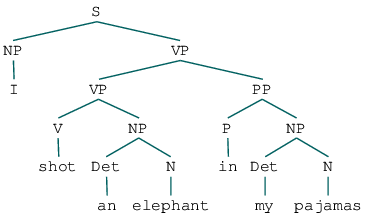

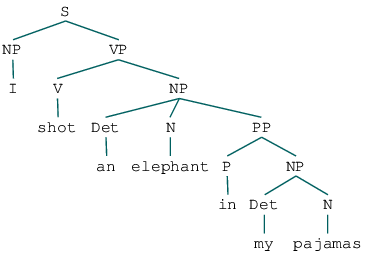

In [40]:
import IPython  # for displaying parse trees inline

# Visualize parse trees
for tree in parser.parse(sentence):
    IPython.display.display(tree)  # instead of tree.draw()

In [41]:
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize

# Recognize named entities in a tagged sentence
tree = ne_chunk(pos_tag(word_tokenize("Antonio joined Udacity Inc. in California.")))
IPython.display.display(tree)

LookupError: 
**********************************************************************
  Resource [93mmaxent_ne_chunker[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('maxent_ne_chunker')
  [0m
  Searched in:
    - '/Users/zoe/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/Users/zoe/anaconda3/nltk_data'
    - '/Users/zoe/anaconda3/share/nltk_data'
    - '/Users/zoe/anaconda3/lib/nltk_data'
    - ''
**********************************************************************


## Stemming & Lemmatization

### Stemming

In [42]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['first', 'time', 'see', 'second', 'renaiss', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definit', 'watch', 'part', '2', 'chang', 'view', 'matrix', 'human', 'peopl', 'one', 'start', 'war', 'ai', 'bad', 'thing']


### Lemmatization

In [43]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'started', 'war', 'ai', 'bad', 'thing']


In [44]:
# Lemmatize verbs by specifying pos
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'start', 'war', 'ai', 'bad', 'thing']
